# Import Library

In [32]:
import sklearn as sk
import matplotlib as plt
import pandas as pd
import numpy as np
import kaggle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt


#  Create Data_Train, Data_Test

In [14]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [15]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Split validation data

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# Test data

In [18]:
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [19]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [22]:
batch_size = 256
num_classes = 10
epochs = 50

# Input image dimensions

In [23]:
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

# Training

In [25]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50


47616/48000 [============================>.] - ETA: 2:57 - loss: 2.9301 - accuracy: 0.07 - ETA: 1:49 - loss: 2.7038 - accuracy: 0.08 - ETA: 1:26 - loss: 2.5866 - accuracy: 0.11 - ETA: 1:16 - loss: 2.5038 - accuracy: 0.13 - ETA: 1:10 - loss: 2.4533 - accuracy: 0.13 - ETA: 1:05 - loss: 2.4094 - accuracy: 0.14 - ETA: 1:02 - loss: 2.3735 - accuracy: 0.15 - ETA: 1:00 - loss: 2.3405 - accuracy: 0.17 - ETA: 59s - loss: 2.3090 - accuracy: 0.1849 - ETA: 58s - loss: 2.2776 - accuracy: 0.200 - ETA: 56s - loss: 2.2449 - accuracy: 0.214 - ETA: 56s - loss: 2.2151 - accuracy: 0.225 - ETA: 54s - loss: 2.1828 - accuracy: 0.236 - ETA: 53s - loss: 2.1611 - accuracy: 0.241 - ETA: 52s - loss: 2.1320 - accuracy: 0.250 - ETA: 51s - loss: 2.1026 - accuracy: 0.258 - ETA: 50s - loss: 2.0705 - accuracy: 0.270 - ETA: 49s - loss: 2.0391 - accuracy: 0.283 - ETA: 48s - loss: 2.0073 - accuracy: 0.293 - ETA: 47s - loss: 1.9826 - accuracy: 0.299 - ETA: 47s - loss: 1.9568 - accuracy: 0.306 - ETA: 46s - loss: 1.9306 - ac

48000/48000 [==============================] - ETA: 0s - loss: 0.9025 - accuracy: 0.66 - 51s 1ms/step - loss: 0.9016 - accuracy: 0.6627 - val_loss: 0.5334 - val_accuracy: 0.7959
Epoch 2/50


47872/48000 [============================>.] - ETA: 45s - loss: 0.6329 - accuracy: 0.777 - ETA: 46s - loss: 0.6057 - accuracy: 0.769 - ETA: 46s - loss: 0.6028 - accuracy: 0.768 - ETA: 47s - loss: 0.5713 - accuracy: 0.783 - ETA: 48s - loss: 0.5720 - accuracy: 0.783 - ETA: 46s - loss: 0.5982 - accuracy: 0.775 - ETA: 46s - loss: 0.5850 - accuracy: 0.781 - ETA: 45s - loss: 0.5883 - accuracy: 0.780 - ETA: 44s - loss: 0.5945 - accuracy: 0.777 - ETA: 44s - loss: 0.5867 - accuracy: 0.779 - ETA: 44s - loss: 0.5882 - accuracy: 0.781 - ETA: 43s - loss: 0.5889 - accuracy: 0.780 - ETA: 43s - loss: 0.5863 - accuracy: 0.783 - ETA: 42s - loss: 0.5825 - accuracy: 0.784 - ETA: 42s - loss: 0.5903 - accuracy: 0.779 - ETA: 42s - loss: 0.5959 - accuracy: 0.779 - ETA: 41s - loss: 0.5944 - accuracy: 0.779 - ETA: 41s - loss: 0.5948 - accuracy: 0.779 - ETA: 41s - loss: 0.5961 - accuracy: 0.777 - ETA: 40s - loss: 0.5950 - accuracy: 0.777 - ETA: 40s - loss: 0.5959 - accuracy: 0.777 - ETA: 40s - loss: 0.5919 - acc

48000/48000 [==============================] - 54s 1ms/step - loss: 0.5355 - accuracy: 0.8001 - val_loss: 0.4196 - val_accuracy: 0.8511
Epoch 3/50


47872/48000 [============================>.] - ETA: 43s - loss: 0.5112 - accuracy: 0.804 - ETA: 41s - loss: 0.5190 - accuracy: 0.796 - ETA: 43s - loss: 0.5093 - accuracy: 0.800 - ETA: 44s - loss: 0.5088 - accuracy: 0.800 - ETA: 43s - loss: 0.5052 - accuracy: 0.803 - ETA: 43s - loss: 0.5066 - accuracy: 0.805 - ETA: 43s - loss: 0.5045 - accuracy: 0.808 - ETA: 43s - loss: 0.5018 - accuracy: 0.811 - ETA: 43s - loss: 0.4986 - accuracy: 0.813 - ETA: 43s - loss: 0.4899 - accuracy: 0.819 - ETA: 43s - loss: 0.4962 - accuracy: 0.817 - ETA: 44s - loss: 0.4924 - accuracy: 0.817 - ETA: 43s - loss: 0.4935 - accuracy: 0.815 - ETA: 43s - loss: 0.4908 - accuracy: 0.817 - ETA: 43s - loss: 0.4853 - accuracy: 0.820 - ETA: 43s - loss: 0.4939 - accuracy: 0.818 - ETA: 42s - loss: 0.4934 - accuracy: 0.819 - ETA: 42s - loss: 0.4983 - accuracy: 0.817 - ETA: 42s - loss: 0.4949 - accuracy: 0.818 - ETA: 42s - loss: 0.4987 - accuracy: 0.817 - ETA: 41s - loss: 0.4999 - accuracy: 0.816 - ETA: 41s - loss: 0.5013 - acc

48000/48000 [==============================] - 54s 1ms/step - loss: 0.4536 - accuracy: 0.8327 - val_loss: 0.3769 - val_accuracy: 0.8636
Epoch 4/50


47872/48000 [============================>.] - ETA: 1:00 - loss: 0.3687 - accuracy: 0.88 - ETA: 54s - loss: 0.3651 - accuracy: 0.8770 - ETA: 53s - loss: 0.3908 - accuracy: 0.859 - ETA: 57s - loss: 0.4135 - accuracy: 0.845 - ETA: 59s - loss: 0.4485 - accuracy: 0.834 - ETA: 57s - loss: 0.4442 - accuracy: 0.837 - ETA: 57s - loss: 0.4446 - accuracy: 0.838 - ETA: 55s - loss: 0.4354 - accuracy: 0.840 - ETA: 54s - loss: 0.4381 - accuracy: 0.841 - ETA: 54s - loss: 0.4355 - accuracy: 0.839 - ETA: 53s - loss: 0.4421 - accuracy: 0.835 - ETA: 52s - loss: 0.4421 - accuracy: 0.835 - ETA: 50s - loss: 0.4348 - accuracy: 0.838 - ETA: 49s - loss: 0.4378 - accuracy: 0.838 - ETA: 49s - loss: 0.4335 - accuracy: 0.837 - ETA: 48s - loss: 0.4314 - accuracy: 0.839 - ETA: 47s - loss: 0.4290 - accuracy: 0.840 - ETA: 47s - loss: 0.4266 - accuracy: 0.841 - ETA: 46s - loss: 0.4267 - accuracy: 0.840 - ETA: 46s - loss: 0.4293 - accuracy: 0.839 - ETA: 46s - loss: 0.4246 - accuracy: 0.841 - ETA: 46s - loss: 0.4246 - ac

48000/48000 [==============================] - 54s 1ms/step - loss: 0.4077 - accuracy: 0.8504 - val_loss: 0.3375 - val_accuracy: 0.8757
Epoch 5/50


47872/48000 [============================>.] - ETA: 39s - loss: 0.4433 - accuracy: 0.851 - ETA: 43s - loss: 0.3988 - accuracy: 0.880 - ETA: 44s - loss: 0.4139 - accuracy: 0.877 - ETA: 45s - loss: 0.4050 - accuracy: 0.871 - ETA: 44s - loss: 0.4069 - accuracy: 0.865 - ETA: 42s - loss: 0.4125 - accuracy: 0.862 - ETA: 42s - loss: 0.4058 - accuracy: 0.860 - ETA: 42s - loss: 0.3969 - accuracy: 0.863 - ETA: 41s - loss: 0.3963 - accuracy: 0.864 - ETA: 41s - loss: 0.4043 - accuracy: 0.862 - ETA: 41s - loss: 0.3992 - accuracy: 0.865 - ETA: 41s - loss: 0.3960 - accuracy: 0.867 - ETA: 40s - loss: 0.3978 - accuracy: 0.864 - ETA: 40s - loss: 0.4005 - accuracy: 0.863 - ETA: 40s - loss: 0.3977 - accuracy: 0.864 - ETA: 40s - loss: 0.3949 - accuracy: 0.864 - ETA: 40s - loss: 0.3897 - accuracy: 0.866 - ETA: 40s - loss: 0.3840 - accuracy: 0.868 - ETA: 39s - loss: 0.3824 - accuracy: 0.868 - ETA: 39s - loss: 0.3867 - accuracy: 0.867 - ETA: 39s - loss: 0.3883 - accuracy: 0.865 - ETA: 39s - loss: 0.3894 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.3735 - accuracy: 0.8654 - val_loss: 0.3121 - val_accuracy: 0.8847
Epoch 6/50


47872/48000 [============================>.] - ETA: 52s - loss: 0.3882 - accuracy: 0.847 - ETA: 54s - loss: 0.3538 - accuracy: 0.869 - ETA: 53s - loss: 0.3302 - accuracy: 0.876 - ETA: 52s - loss: 0.3397 - accuracy: 0.874 - ETA: 52s - loss: 0.3472 - accuracy: 0.868 - ETA: 53s - loss: 0.3617 - accuracy: 0.863 - ETA: 52s - loss: 0.3568 - accuracy: 0.866 - ETA: 51s - loss: 0.3485 - accuracy: 0.868 - ETA: 50s - loss: 0.3514 - accuracy: 0.864 - ETA: 50s - loss: 0.3569 - accuracy: 0.863 - ETA: 49s - loss: 0.3559 - accuracy: 0.864 - ETA: 49s - loss: 0.3480 - accuracy: 0.867 - ETA: 48s - loss: 0.3491 - accuracy: 0.866 - ETA: 48s - loss: 0.3439 - accuracy: 0.869 - ETA: 49s - loss: 0.3485 - accuracy: 0.868 - ETA: 49s - loss: 0.3445 - accuracy: 0.869 - ETA: 49s - loss: 0.3459 - accuracy: 0.869 - ETA: 49s - loss: 0.3492 - accuracy: 0.869 - ETA: 49s - loss: 0.3520 - accuracy: 0.869 - ETA: 50s - loss: 0.3526 - accuracy: 0.868 - ETA: 50s - loss: 0.3516 - accuracy: 0.868 - ETA: 50s - loss: 0.3534 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.3579 - accuracy: 0.8696 - val_loss: 0.3043 - val_accuracy: 0.8863
Epoch 7/50


47872/48000 [============================>.] - ETA: 43s - loss: 0.3103 - accuracy: 0.886 - ETA: 46s - loss: 0.3074 - accuracy: 0.892 - ETA: 46s - loss: 0.3494 - accuracy: 0.880 - ETA: 46s - loss: 0.3523 - accuracy: 0.872 - ETA: 45s - loss: 0.3440 - accuracy: 0.874 - ETA: 45s - loss: 0.3325 - accuracy: 0.880 - ETA: 46s - loss: 0.3484 - accuracy: 0.878 - ETA: 45s - loss: 0.3448 - accuracy: 0.877 - ETA: 44s - loss: 0.3534 - accuracy: 0.873 - ETA: 44s - loss: 0.3492 - accuracy: 0.875 - ETA: 44s - loss: 0.3481 - accuracy: 0.876 - ETA: 45s - loss: 0.3504 - accuracy: 0.874 - ETA: 45s - loss: 0.3535 - accuracy: 0.872 - ETA: 47s - loss: 0.3536 - accuracy: 0.871 - ETA: 46s - loss: 0.3495 - accuracy: 0.872 - ETA: 46s - loss: 0.3479 - accuracy: 0.873 - ETA: 45s - loss: 0.3457 - accuracy: 0.873 - ETA: 45s - loss: 0.3498 - accuracy: 0.873 - ETA: 45s - loss: 0.3505 - accuracy: 0.872 - ETA: 44s - loss: 0.3475 - accuracy: 0.873 - ETA: 45s - loss: 0.3464 - accuracy: 0.874 - ETA: 45s - loss: 0.3437 - acc

48000/48000 [==============================] - 52s 1ms/step - loss: 0.3369 - accuracy: 0.8774 - val_loss: 0.2882 - val_accuracy: 0.8933
Epoch 8/50


47872/48000 [============================>.] - ETA: 55s - loss: 0.2695 - accuracy: 0.902 - ETA: 51s - loss: 0.2875 - accuracy: 0.880 - ETA: 49s - loss: 0.3155 - accuracy: 0.875 - ETA: 50s - loss: 0.3117 - accuracy: 0.880 - ETA: 49s - loss: 0.3071 - accuracy: 0.881 - ETA: 47s - loss: 0.3103 - accuracy: 0.881 - ETA: 46s - loss: 0.3176 - accuracy: 0.878 - ETA: 47s - loss: 0.3328 - accuracy: 0.875 - ETA: 46s - loss: 0.3292 - accuracy: 0.875 - ETA: 45s - loss: 0.3341 - accuracy: 0.875 - ETA: 44s - loss: 0.3323 - accuracy: 0.875 - ETA: 44s - loss: 0.3280 - accuracy: 0.877 - ETA: 43s - loss: 0.3185 - accuracy: 0.881 - ETA: 43s - loss: 0.3182 - accuracy: 0.881 - ETA: 42s - loss: 0.3172 - accuracy: 0.881 - ETA: 42s - loss: 0.3136 - accuracy: 0.883 - ETA: 42s - loss: 0.3127 - accuracy: 0.884 - ETA: 41s - loss: 0.3103 - accuracy: 0.885 - ETA: 41s - loss: 0.3163 - accuracy: 0.885 - ETA: 40s - loss: 0.3171 - accuracy: 0.885 - ETA: 40s - loss: 0.3179 - accuracy: 0.884 - ETA: 40s - loss: 0.3160 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.3209 - accuracy: 0.8820 - val_loss: 0.2855 - val_accuracy: 0.8957
Epoch 9/50


47872/48000 [============================>.] - ETA: 47s - loss: 0.4233 - accuracy: 0.851 - ETA: 48s - loss: 0.3347 - accuracy: 0.880 - ETA: 45s - loss: 0.3229 - accuracy: 0.884 - ETA: 43s - loss: 0.2942 - accuracy: 0.899 - ETA: 44s - loss: 0.2878 - accuracy: 0.900 - ETA: 45s - loss: 0.2872 - accuracy: 0.900 - ETA: 45s - loss: 0.2843 - accuracy: 0.901 - ETA: 44s - loss: 0.2964 - accuracy: 0.896 - ETA: 44s - loss: 0.2934 - accuracy: 0.897 - ETA: 44s - loss: 0.2943 - accuracy: 0.896 - ETA: 43s - loss: 0.2975 - accuracy: 0.893 - ETA: 42s - loss: 0.2961 - accuracy: 0.893 - ETA: 42s - loss: 0.2975 - accuracy: 0.891 - ETA: 42s - loss: 0.3034 - accuracy: 0.888 - ETA: 41s - loss: 0.3000 - accuracy: 0.890 - ETA: 41s - loss: 0.3051 - accuracy: 0.889 - ETA: 40s - loss: 0.3077 - accuracy: 0.887 - ETA: 41s - loss: 0.3051 - accuracy: 0.888 - ETA: 41s - loss: 0.3065 - accuracy: 0.886 - ETA: 40s - loss: 0.3059 - accuracy: 0.888 - ETA: 40s - loss: 0.3063 - accuracy: 0.887 - ETA: 40s - loss: 0.3052 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.3083 - accuracy: 0.8861 - val_loss: 0.2688 - val_accuracy: 0.9006
Epoch 10/50


47872/48000 [============================>.] - ETA: 44s - loss: 0.3468 - accuracy: 0.886 - ETA: 44s - loss: 0.3125 - accuracy: 0.880 - ETA: 45s - loss: 0.2959 - accuracy: 0.889 - ETA: 43s - loss: 0.2863 - accuracy: 0.892 - ETA: 42s - loss: 0.2927 - accuracy: 0.889 - ETA: 42s - loss: 0.2934 - accuracy: 0.890 - ETA: 43s - loss: 0.2983 - accuracy: 0.890 - ETA: 43s - loss: 0.2897 - accuracy: 0.893 - ETA: 44s - loss: 0.2975 - accuracy: 0.888 - ETA: 44s - loss: 0.2914 - accuracy: 0.890 - ETA: 44s - loss: 0.2923 - accuracy: 0.888 - ETA: 44s - loss: 0.2904 - accuracy: 0.888 - ETA: 44s - loss: 0.2967 - accuracy: 0.886 - ETA: 44s - loss: 0.2956 - accuracy: 0.886 - ETA: 44s - loss: 0.2974 - accuracy: 0.886 - ETA: 43s - loss: 0.2952 - accuracy: 0.887 - ETA: 43s - loss: 0.2964 - accuracy: 0.888 - ETA: 42s - loss: 0.2986 - accuracy: 0.886 - ETA: 42s - loss: 0.2980 - accuracy: 0.886 - ETA: 42s - loss: 0.2974 - accuracy: 0.887 - ETA: 42s - loss: 0.2963 - accuracy: 0.887 - ETA: 42s - loss: 0.2974 - acc

48000/48000 [==============================] - 50s 1ms/step - loss: 0.3025 - accuracy: 0.8887 - val_loss: 0.2781 - val_accuracy: 0.8955
Epoch 11/50


48000/48000 [==============================] - ETA: 43s - loss: 0.3059 - accuracy: 0.878 - ETA: 46s - loss: 0.2757 - accuracy: 0.892 - ETA: 44s - loss: 0.2589 - accuracy: 0.906 - ETA: 45s - loss: 0.2692 - accuracy: 0.904 - ETA: 45s - loss: 0.2798 - accuracy: 0.900 - ETA: 45s - loss: 0.2874 - accuracy: 0.897 - ETA: 43s - loss: 0.2905 - accuracy: 0.894 - ETA: 42s - loss: 0.2936 - accuracy: 0.894 - ETA: 43s - loss: 0.2924 - accuracy: 0.894 - ETA: 43s - loss: 0.2978 - accuracy: 0.893 - ETA: 42s - loss: 0.2951 - accuracy: 0.894 - ETA: 42s - loss: 0.2927 - accuracy: 0.895 - ETA: 41s - loss: 0.2950 - accuracy: 0.894 - ETA: 41s - loss: 0.2955 - accuracy: 0.894 - ETA: 41s - loss: 0.2926 - accuracy: 0.895 - ETA: 40s - loss: 0.2954 - accuracy: 0.893 - ETA: 40s - loss: 0.2944 - accuracy: 0.894 - ETA: 40s - loss: 0.2983 - accuracy: 0.892 - ETA: 40s - loss: 0.2952 - accuracy: 0.893 - ETA: 39s - loss: 0.2912 - accuracy: 0.895 - ETA: 39s - loss: 0.2880 - accuracy: 0.897 - ETA: 39s - loss: 0.2876 - acc

Epoch 12/50


47872/48000 [============================>.] - ETA: 47s - loss: 0.2280 - accuracy: 0.918 - ETA: 44s - loss: 0.2488 - accuracy: 0.910 - ETA: 43s - loss: 0.2619 - accuracy: 0.907 - ETA: 43s - loss: 0.2848 - accuracy: 0.897 - ETA: 44s - loss: 0.2834 - accuracy: 0.894 - ETA: 43s - loss: 0.2873 - accuracy: 0.892 - ETA: 42s - loss: 0.2863 - accuracy: 0.890 - ETA: 41s - loss: 0.2792 - accuracy: 0.893 - ETA: 41s - loss: 0.2826 - accuracy: 0.891 - ETA: 41s - loss: 0.2754 - accuracy: 0.893 - ETA: 41s - loss: 0.2731 - accuracy: 0.895 - ETA: 40s - loss: 0.2823 - accuracy: 0.892 - ETA: 40s - loss: 0.2866 - accuracy: 0.892 - ETA: 40s - loss: 0.2829 - accuracy: 0.892 - ETA: 39s - loss: 0.2887 - accuracy: 0.889 - ETA: 39s - loss: 0.2842 - accuracy: 0.891 - ETA: 39s - loss: 0.2800 - accuracy: 0.892 - ETA: 39s - loss: 0.2799 - accuracy: 0.893 - ETA: 39s - loss: 0.2814 - accuracy: 0.892 - ETA: 39s - loss: 0.2826 - accuracy: 0.893 - ETA: 38s - loss: 0.2819 - accuracy: 0.894 - ETA: 38s - loss: 0.2836 - acc

48000/48000 [==============================] - 48s 1ms/step - loss: 0.2861 - accuracy: 0.8950 - val_loss: 0.2534 - val_accuracy: 0.9058
Epoch 13/50


47872/48000 [============================>.] - ETA: 40s - loss: 0.2260 - accuracy: 0.890 - ETA: 39s - loss: 0.2277 - accuracy: 0.902 - ETA: 42s - loss: 0.2524 - accuracy: 0.902 - ETA: 42s - loss: 0.2438 - accuracy: 0.907 - ETA: 42s - loss: 0.2588 - accuracy: 0.903 - ETA: 41s - loss: 0.2590 - accuracy: 0.904 - ETA: 41s - loss: 0.2673 - accuracy: 0.902 - ETA: 41s - loss: 0.2613 - accuracy: 0.905 - ETA: 41s - loss: 0.2612 - accuracy: 0.907 - ETA: 41s - loss: 0.2654 - accuracy: 0.906 - ETA: 41s - loss: 0.2702 - accuracy: 0.904 - ETA: 40s - loss: 0.2691 - accuracy: 0.904 - ETA: 40s - loss: 0.2707 - accuracy: 0.904 - ETA: 40s - loss: 0.2714 - accuracy: 0.904 - ETA: 39s - loss: 0.2750 - accuracy: 0.902 - ETA: 39s - loss: 0.2758 - accuracy: 0.901 - ETA: 39s - loss: 0.2732 - accuracy: 0.901 - ETA: 39s - loss: 0.2731 - accuracy: 0.901 - ETA: 39s - loss: 0.2729 - accuracy: 0.901 - ETA: 39s - loss: 0.2723 - accuracy: 0.900 - ETA: 39s - loss: 0.2742 - accuracy: 0.900 - ETA: 38s - loss: 0.2727 - acc

48000/48000 [==============================] - 50s 1ms/step - loss: 0.2764 - accuracy: 0.8975 - val_loss: 0.2557 - val_accuracy: 0.9047
Epoch 14/50


47872/48000 [============================>.] - ETA: 46s - loss: 0.3522 - accuracy: 0.886 - ETA: 47s - loss: 0.3505 - accuracy: 0.877 - ETA: 45s - loss: 0.3018 - accuracy: 0.890 - ETA: 45s - loss: 0.3031 - accuracy: 0.889 - ETA: 45s - loss: 0.2889 - accuracy: 0.896 - ETA: 45s - loss: 0.2862 - accuracy: 0.899 - ETA: 45s - loss: 0.2914 - accuracy: 0.897 - ETA: 45s - loss: 0.2830 - accuracy: 0.900 - ETA: 45s - loss: 0.2887 - accuracy: 0.897 - ETA: 45s - loss: 0.2836 - accuracy: 0.899 - ETA: 44s - loss: 0.2825 - accuracy: 0.898 - ETA: 44s - loss: 0.2828 - accuracy: 0.899 - ETA: 44s - loss: 0.2814 - accuracy: 0.898 - ETA: 44s - loss: 0.2824 - accuracy: 0.898 - ETA: 43s - loss: 0.2852 - accuracy: 0.897 - ETA: 43s - loss: 0.2824 - accuracy: 0.898 - ETA: 43s - loss: 0.2791 - accuracy: 0.899 - ETA: 43s - loss: 0.2804 - accuracy: 0.899 - ETA: 42s - loss: 0.2848 - accuracy: 0.897 - ETA: 42s - loss: 0.2872 - accuracy: 0.896 - ETA: 42s - loss: 0.2876 - accuracy: 0.896 - ETA: 42s - loss: 0.2876 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.2715 - accuracy: 0.9008 - val_loss: 0.2451 - val_accuracy: 0.9082
Epoch 15/50


47872/48000 [============================>.] - ETA: 49s - loss: 0.3473 - accuracy: 0.890 - ETA: 46s - loss: 0.2987 - accuracy: 0.892 - ETA: 45s - loss: 0.2989 - accuracy: 0.888 - ETA: 45s - loss: 0.2889 - accuracy: 0.893 - ETA: 45s - loss: 0.2878 - accuracy: 0.900 - ETA: 45s - loss: 0.2936 - accuracy: 0.897 - ETA: 45s - loss: 0.2879 - accuracy: 0.897 - ETA: 46s - loss: 0.2849 - accuracy: 0.897 - ETA: 45s - loss: 0.2839 - accuracy: 0.895 - ETA: 45s - loss: 0.2761 - accuracy: 0.898 - ETA: 45s - loss: 0.2691 - accuracy: 0.901 - ETA: 45s - loss: 0.2689 - accuracy: 0.900 - ETA: 44s - loss: 0.2677 - accuracy: 0.902 - ETA: 43s - loss: 0.2665 - accuracy: 0.902 - ETA: 43s - loss: 0.2709 - accuracy: 0.902 - ETA: 43s - loss: 0.2688 - accuracy: 0.902 - ETA: 43s - loss: 0.2739 - accuracy: 0.900 - ETA: 42s - loss: 0.2748 - accuracy: 0.900 - ETA: 42s - loss: 0.2720 - accuracy: 0.900 - ETA: 42s - loss: 0.2747 - accuracy: 0.900 - ETA: 41s - loss: 0.2762 - accuracy: 0.899 - ETA: 41s - loss: 0.2729 - acc

48000/48000 [==============================] - 55s 1ms/step - loss: 0.2676 - accuracy: 0.9019 - val_loss: 0.2448 - val_accuracy: 0.9089
Epoch 16/50


47872/48000 [============================>.] - ETA: 44s - loss: 0.2961 - accuracy: 0.906 - ETA: 42s - loss: 0.2825 - accuracy: 0.902 - ETA: 44s - loss: 0.2617 - accuracy: 0.904 - ETA: 46s - loss: 0.2498 - accuracy: 0.907 - ETA: 45s - loss: 0.2538 - accuracy: 0.908 - ETA: 45s - loss: 0.2402 - accuracy: 0.911 - ETA: 44s - loss: 0.2323 - accuracy: 0.914 - ETA: 44s - loss: 0.2373 - accuracy: 0.914 - ETA: 43s - loss: 0.2372 - accuracy: 0.912 - ETA: 42s - loss: 0.2331 - accuracy: 0.912 - ETA: 42s - loss: 0.2324 - accuracy: 0.911 - ETA: 42s - loss: 0.2328 - accuracy: 0.911 - ETA: 42s - loss: 0.2334 - accuracy: 0.912 - ETA: 42s - loss: 0.2362 - accuracy: 0.910 - ETA: 42s - loss: 0.2376 - accuracy: 0.908 - ETA: 43s - loss: 0.2397 - accuracy: 0.908 - ETA: 43s - loss: 0.2419 - accuracy: 0.907 - ETA: 43s - loss: 0.2479 - accuracy: 0.906 - ETA: 42s - loss: 0.2526 - accuracy: 0.904 - ETA: 42s - loss: 0.2511 - accuracy: 0.905 - ETA: 42s - loss: 0.2506 - accuracy: 0.904 - ETA: 42s - loss: 0.2470 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.2605 - accuracy: 0.9036 - val_loss: 0.2377 - val_accuracy: 0.9107
Epoch 17/50


47872/48000 [============================>.] - ETA: 44s - loss: 0.2771 - accuracy: 0.906 - ETA: 48s - loss: 0.2607 - accuracy: 0.914 - ETA: 47s - loss: 0.2704 - accuracy: 0.907 - ETA: 45s - loss: 0.2670 - accuracy: 0.907 - ETA: 44s - loss: 0.2626 - accuracy: 0.907 - ETA: 44s - loss: 0.2660 - accuracy: 0.902 - ETA: 44s - loss: 0.2689 - accuracy: 0.900 - ETA: 43s - loss: 0.2645 - accuracy: 0.900 - ETA: 42s - loss: 0.2633 - accuracy: 0.900 - ETA: 42s - loss: 0.2644 - accuracy: 0.901 - ETA: 43s - loss: 0.2614 - accuracy: 0.901 - ETA: 43s - loss: 0.2630 - accuracy: 0.902 - ETA: 42s - loss: 0.2550 - accuracy: 0.906 - ETA: 42s - loss: 0.2547 - accuracy: 0.905 - ETA: 41s - loss: 0.2588 - accuracy: 0.905 - ETA: 41s - loss: 0.2595 - accuracy: 0.905 - ETA: 41s - loss: 0.2610 - accuracy: 0.905 - ETA: 40s - loss: 0.2591 - accuracy: 0.905 - ETA: 40s - loss: 0.2561 - accuracy: 0.906 - ETA: 40s - loss: 0.2540 - accuracy: 0.907 - ETA: 41s - loss: 0.2520 - accuracy: 0.907 - ETA: 41s - loss: 0.2503 - acc

48000/48000 [==============================] - 53s 1ms/step - loss: 0.2533 - accuracy: 0.9056 - val_loss: 0.2326 - val_accuracy: 0.9111
Epoch 18/50


47872/48000 [============================>.] - ETA: 49s - loss: 0.2462 - accuracy: 0.906 - ETA: 49s - loss: 0.2574 - accuracy: 0.910 - ETA: 54s - loss: 0.2742 - accuracy: 0.895 - ETA: 53s - loss: 0.2696 - accuracy: 0.892 - ETA: 51s - loss: 0.2743 - accuracy: 0.890 - ETA: 52s - loss: 0.2648 - accuracy: 0.893 - ETA: 51s - loss: 0.2559 - accuracy: 0.898 - ETA: 50s - loss: 0.2592 - accuracy: 0.899 - ETA: 50s - loss: 0.2601 - accuracy: 0.901 - ETA: 49s - loss: 0.2538 - accuracy: 0.903 - ETA: 49s - loss: 0.2585 - accuracy: 0.903 - ETA: 48s - loss: 0.2571 - accuracy: 0.902 - ETA: 47s - loss: 0.2571 - accuracy: 0.903 - ETA: 47s - loss: 0.2562 - accuracy: 0.902 - ETA: 46s - loss: 0.2540 - accuracy: 0.904 - ETA: 46s - loss: 0.2561 - accuracy: 0.905 - ETA: 46s - loss: 0.2525 - accuracy: 0.907 - ETA: 46s - loss: 0.2522 - accuracy: 0.906 - ETA: 45s - loss: 0.2566 - accuracy: 0.904 - ETA: 45s - loss: 0.2555 - accuracy: 0.905 - ETA: 44s - loss: 0.2563 - accuracy: 0.904 - ETA: 44s - loss: 0.2525 - acc

48000/48000 [==============================] - 53s 1ms/step - loss: 0.2521 - accuracy: 0.9072 - val_loss: 0.2307 - val_accuracy: 0.9151
Epoch 19/50


47872/48000 [============================>.] - ETA: 46s - loss: 0.2739 - accuracy: 0.910 - ETA: 45s - loss: 0.2570 - accuracy: 0.914 - ETA: 45s - loss: 0.2409 - accuracy: 0.919 - ETA: 46s - loss: 0.2204 - accuracy: 0.924 - ETA: 47s - loss: 0.2250 - accuracy: 0.919 - ETA: 46s - loss: 0.2258 - accuracy: 0.921 - ETA: 46s - loss: 0.2277 - accuracy: 0.920 - ETA: 46s - loss: 0.2321 - accuracy: 0.917 - ETA: 46s - loss: 0.2285 - accuracy: 0.917 - ETA: 45s - loss: 0.2316 - accuracy: 0.915 - ETA: 45s - loss: 0.2368 - accuracy: 0.911 - ETA: 45s - loss: 0.2362 - accuracy: 0.911 - ETA: 44s - loss: 0.2394 - accuracy: 0.910 - ETA: 43s - loss: 0.2409 - accuracy: 0.908 - ETA: 43s - loss: 0.2400 - accuracy: 0.909 - ETA: 43s - loss: 0.2401 - accuracy: 0.910 - ETA: 42s - loss: 0.2410 - accuracy: 0.910 - ETA: 42s - loss: 0.2410 - accuracy: 0.910 - ETA: 42s - loss: 0.2420 - accuracy: 0.910 - ETA: 42s - loss: 0.2420 - accuracy: 0.910 - ETA: 41s - loss: 0.2433 - accuracy: 0.910 - ETA: 41s - loss: 0.2430 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.2479 - accuracy: 0.9075 - val_loss: 0.2297 - val_accuracy: 0.9138
Epoch 20/50


47872/48000 [============================>.] - ETA: 43s - loss: 0.2024 - accuracy: 0.914 - ETA: 43s - loss: 0.2373 - accuracy: 0.906 - ETA: 45s - loss: 0.2440 - accuracy: 0.903 - ETA: 44s - loss: 0.2562 - accuracy: 0.899 - ETA: 43s - loss: 0.2479 - accuracy: 0.904 - ETA: 42s - loss: 0.2412 - accuracy: 0.908 - ETA: 43s - loss: 0.2293 - accuracy: 0.911 - ETA: 43s - loss: 0.2382 - accuracy: 0.907 - ETA: 43s - loss: 0.2358 - accuracy: 0.910 - ETA: 42s - loss: 0.2372 - accuracy: 0.911 - ETA: 41s - loss: 0.2357 - accuracy: 0.911 - ETA: 41s - loss: 0.2373 - accuracy: 0.910 - ETA: 41s - loss: 0.2377 - accuracy: 0.909 - ETA: 41s - loss: 0.2392 - accuracy: 0.908 - ETA: 40s - loss: 0.2432 - accuracy: 0.907 - ETA: 40s - loss: 0.2429 - accuracy: 0.907 - ETA: 40s - loss: 0.2430 - accuracy: 0.907 - ETA: 39s - loss: 0.2426 - accuracy: 0.907 - ETA: 39s - loss: 0.2423 - accuracy: 0.908 - ETA: 39s - loss: 0.2488 - accuracy: 0.905 - ETA: 39s - loss: 0.2507 - accuracy: 0.904 - ETA: 39s - loss: 0.2519 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.2459 - accuracy: 0.9096 - val_loss: 0.2320 - val_accuracy: 0.9129
Epoch 21/50


47872/48000 [============================>.] - ETA: 45s - loss: 0.2571 - accuracy: 0.906 - ETA: 44s - loss: 0.2412 - accuracy: 0.916 - ETA: 45s - loss: 0.2349 - accuracy: 0.912 - ETA: 45s - loss: 0.2316 - accuracy: 0.912 - ETA: 45s - loss: 0.2356 - accuracy: 0.911 - ETA: 44s - loss: 0.2234 - accuracy: 0.914 - ETA: 43s - loss: 0.2250 - accuracy: 0.915 - ETA: 42s - loss: 0.2242 - accuracy: 0.917 - ETA: 42s - loss: 0.2349 - accuracy: 0.914 - ETA: 42s - loss: 0.2340 - accuracy: 0.914 - ETA: 42s - loss: 0.2350 - accuracy: 0.914 - ETA: 41s - loss: 0.2341 - accuracy: 0.915 - ETA: 41s - loss: 0.2322 - accuracy: 0.914 - ETA: 41s - loss: 0.2392 - accuracy: 0.910 - ETA: 40s - loss: 0.2395 - accuracy: 0.910 - ETA: 40s - loss: 0.2412 - accuracy: 0.910 - ETA: 39s - loss: 0.2412 - accuracy: 0.910 - ETA: 39s - loss: 0.2427 - accuracy: 0.910 - ETA: 39s - loss: 0.2416 - accuracy: 0.912 - ETA: 39s - loss: 0.2415 - accuracy: 0.911 - ETA: 38s - loss: 0.2421 - accuracy: 0.911 - ETA: 38s - loss: 0.2421 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.2412 - accuracy: 0.9094 - val_loss: 0.2334 - val_accuracy: 0.9107
Epoch 22/50


47872/48000 [============================>.] - ETA: 43s - loss: 0.2780 - accuracy: 0.890 - ETA: 45s - loss: 0.2509 - accuracy: 0.904 - ETA: 53s - loss: 0.2424 - accuracy: 0.904 - ETA: 51s - loss: 0.2277 - accuracy: 0.912 - ETA: 49s - loss: 0.2273 - accuracy: 0.912 - ETA: 52s - loss: 0.2320 - accuracy: 0.913 - ETA: 52s - loss: 0.2416 - accuracy: 0.909 - ETA: 50s - loss: 0.2431 - accuracy: 0.910 - ETA: 50s - loss: 0.2410 - accuracy: 0.911 - ETA: 49s - loss: 0.2440 - accuracy: 0.908 - ETA: 49s - loss: 0.2400 - accuracy: 0.911 - ETA: 48s - loss: 0.2377 - accuracy: 0.911 - ETA: 47s - loss: 0.2415 - accuracy: 0.910 - ETA: 48s - loss: 0.2411 - accuracy: 0.910 - ETA: 48s - loss: 0.2418 - accuracy: 0.909 - ETA: 48s - loss: 0.2432 - accuracy: 0.907 - ETA: 48s - loss: 0.2389 - accuracy: 0.909 - ETA: 48s - loss: 0.2384 - accuracy: 0.910 - ETA: 47s - loss: 0.2374 - accuracy: 0.910 - ETA: 47s - loss: 0.2341 - accuracy: 0.910 - ETA: 47s - loss: 0.2349 - accuracy: 0.911 - ETA: 47s - loss: 0.2351 - acc

48000/48000 [==============================] - 53s 1ms/step - loss: 0.2367 - accuracy: 0.9111 - val_loss: 0.2233 - val_accuracy: 0.9153
Epoch 23/50


47872/48000 [============================>.] - ETA: 59s - loss: 0.2045 - accuracy: 0.918 - ETA: 56s - loss: 0.2265 - accuracy: 0.912 - ETA: 57s - loss: 0.2295 - accuracy: 0.908 - ETA: 55s - loss: 0.2197 - accuracy: 0.915 - ETA: 55s - loss: 0.2371 - accuracy: 0.906 - ETA: 52s - loss: 0.2210 - accuracy: 0.913 - ETA: 52s - loss: 0.2099 - accuracy: 0.918 - ETA: 52s - loss: 0.2201 - accuracy: 0.914 - ETA: 51s - loss: 0.2264 - accuracy: 0.913 - ETA: 51s - loss: 0.2225 - accuracy: 0.915 - ETA: 51s - loss: 0.2195 - accuracy: 0.916 - ETA: 51s - loss: 0.2224 - accuracy: 0.916 - ETA: 51s - loss: 0.2176 - accuracy: 0.917 - ETA: 51s - loss: 0.2212 - accuracy: 0.918 - ETA: 50s - loss: 0.2222 - accuracy: 0.916 - ETA: 49s - loss: 0.2199 - accuracy: 0.916 - ETA: 49s - loss: 0.2197 - accuracy: 0.916 - ETA: 49s - loss: 0.2247 - accuracy: 0.914 - ETA: 48s - loss: 0.2233 - accuracy: 0.914 - ETA: 47s - loss: 0.2217 - accuracy: 0.915 - ETA: 47s - loss: 0.2217 - accuracy: 0.915 - ETA: 46s - loss: 0.2222 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.2314 - accuracy: 0.9130 - val_loss: 0.2240 - val_accuracy: 0.9168
Epoch 24/50


47872/48000 [============================>.] - ETA: 45s - loss: 0.1898 - accuracy: 0.929 - ETA: 44s - loss: 0.2179 - accuracy: 0.916 - ETA: 43s - loss: 0.2266 - accuracy: 0.915 - ETA: 44s - loss: 0.2357 - accuracy: 0.913 - ETA: 44s - loss: 0.2369 - accuracy: 0.913 - ETA: 42s - loss: 0.2402 - accuracy: 0.910 - ETA: 42s - loss: 0.2363 - accuracy: 0.912 - ETA: 42s - loss: 0.2358 - accuracy: 0.912 - ETA: 43s - loss: 0.2334 - accuracy: 0.914 - ETA: 43s - loss: 0.2317 - accuracy: 0.913 - ETA: 43s - loss: 0.2332 - accuracy: 0.914 - ETA: 42s - loss: 0.2339 - accuracy: 0.913 - ETA: 43s - loss: 0.2303 - accuracy: 0.914 - ETA: 43s - loss: 0.2259 - accuracy: 0.914 - ETA: 43s - loss: 0.2265 - accuracy: 0.915 - ETA: 44s - loss: 0.2261 - accuracy: 0.915 - ETA: 44s - loss: 0.2229 - accuracy: 0.917 - ETA: 44s - loss: 0.2247 - accuracy: 0.916 - ETA: 44s - loss: 0.2284 - accuracy: 0.917 - ETA: 44s - loss: 0.2289 - accuracy: 0.916 - ETA: 44s - loss: 0.2280 - accuracy: 0.916 - ETA: 44s - loss: 0.2252 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.2298 - accuracy: 0.9124 - val_loss: 0.2207 - val_accuracy: 0.9182
Epoch 25/50


47872/48000 [============================>.] - ETA: 46s - loss: 0.2156 - accuracy: 0.933 - ETA: 44s - loss: 0.2414 - accuracy: 0.918 - ETA: 43s - loss: 0.2559 - accuracy: 0.906 - ETA: 44s - loss: 0.2651 - accuracy: 0.907 - ETA: 44s - loss: 0.2591 - accuracy: 0.907 - ETA: 43s - loss: 0.2532 - accuracy: 0.904 - ETA: 42s - loss: 0.2554 - accuracy: 0.900 - ETA: 42s - loss: 0.2465 - accuracy: 0.903 - ETA: 42s - loss: 0.2451 - accuracy: 0.905 - ETA: 42s - loss: 0.2506 - accuracy: 0.904 - ETA: 41s - loss: 0.2474 - accuracy: 0.905 - ETA: 41s - loss: 0.2459 - accuracy: 0.906 - ETA: 41s - loss: 0.2421 - accuracy: 0.908 - ETA: 40s - loss: 0.2419 - accuracy: 0.909 - ETA: 40s - loss: 0.2384 - accuracy: 0.910 - ETA: 40s - loss: 0.2324 - accuracy: 0.912 - ETA: 40s - loss: 0.2301 - accuracy: 0.914 - ETA: 40s - loss: 0.2296 - accuracy: 0.914 - ETA: 39s - loss: 0.2296 - accuracy: 0.915 - ETA: 39s - loss: 0.2272 - accuracy: 0.915 - ETA: 39s - loss: 0.2261 - accuracy: 0.915 - ETA: 39s - loss: 0.2261 - acc

48000/48000 [==============================] - 50s 1ms/step - loss: 0.2241 - accuracy: 0.9158 - val_loss: 0.2250 - val_accuracy: 0.9130
Epoch 26/50


47872/48000 [============================>.] - ETA: 42s - loss: 0.1690 - accuracy: 0.933 - ETA: 44s - loss: 0.2317 - accuracy: 0.906 - ETA: 47s - loss: 0.2297 - accuracy: 0.903 - ETA: 47s - loss: 0.2190 - accuracy: 0.909 - ETA: 47s - loss: 0.2125 - accuracy: 0.911 - ETA: 48s - loss: 0.2279 - accuracy: 0.907 - ETA: 48s - loss: 0.2369 - accuracy: 0.903 - ETA: 48s - loss: 0.2388 - accuracy: 0.901 - ETA: 47s - loss: 0.2444 - accuracy: 0.900 - ETA: 47s - loss: 0.2467 - accuracy: 0.902 - ETA: 46s - loss: 0.2417 - accuracy: 0.904 - ETA: 46s - loss: 0.2369 - accuracy: 0.905 - ETA: 45s - loss: 0.2366 - accuracy: 0.905 - ETA: 46s - loss: 0.2357 - accuracy: 0.906 - ETA: 45s - loss: 0.2434 - accuracy: 0.903 - ETA: 44s - loss: 0.2406 - accuracy: 0.904 - ETA: 44s - loss: 0.2404 - accuracy: 0.905 - ETA: 44s - loss: 0.2370 - accuracy: 0.906 - ETA: 44s - loss: 0.2343 - accuracy: 0.907 - ETA: 43s - loss: 0.2339 - accuracy: 0.908 - ETA: 43s - loss: 0.2355 - accuracy: 0.907 - ETA: 43s - loss: 0.2360 - acc

48000/48000 [==============================] - 50s 1ms/step - loss: 0.2233 - accuracy: 0.9158 - val_loss: 0.2245 - val_accuracy: 0.9160
Epoch 27/50


47872/48000 [============================>.] - ETA: 43s - loss: 0.2800 - accuracy: 0.886 - ETA: 43s - loss: 0.2451 - accuracy: 0.900 - ETA: 42s - loss: 0.2487 - accuracy: 0.898 - ETA: 41s - loss: 0.2293 - accuracy: 0.905 - ETA: 41s - loss: 0.2177 - accuracy: 0.910 - ETA: 41s - loss: 0.2132 - accuracy: 0.910 - ETA: 41s - loss: 0.2083 - accuracy: 0.913 - ETA: 41s - loss: 0.2092 - accuracy: 0.914 - ETA: 41s - loss: 0.2138 - accuracy: 0.912 - ETA: 41s - loss: 0.2132 - accuracy: 0.912 - ETA: 40s - loss: 0.2156 - accuracy: 0.911 - ETA: 40s - loss: 0.2207 - accuracy: 0.909 - ETA: 40s - loss: 0.2194 - accuracy: 0.909 - ETA: 41s - loss: 0.2185 - accuracy: 0.911 - ETA: 40s - loss: 0.2132 - accuracy: 0.913 - ETA: 40s - loss: 0.2118 - accuracy: 0.914 - ETA: 40s - loss: 0.2162 - accuracy: 0.913 - ETA: 39s - loss: 0.2198 - accuracy: 0.912 - ETA: 39s - loss: 0.2220 - accuracy: 0.910 - ETA: 39s - loss: 0.2231 - accuracy: 0.910 - ETA: 38s - loss: 0.2243 - accuracy: 0.911 - ETA: 38s - loss: 0.2234 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.2195 - accuracy: 0.9177 - val_loss: 0.2190 - val_accuracy: 0.9178
Epoch 28/50


47872/48000 [============================>.] - ETA: 52s - loss: 0.2639 - accuracy: 0.925 - ETA: 52s - loss: 0.2716 - accuracy: 0.910 - ETA: 52s - loss: 0.2553 - accuracy: 0.908 - ETA: 51s - loss: 0.2437 - accuracy: 0.907 - ETA: 51s - loss: 0.2291 - accuracy: 0.910 - ETA: 51s - loss: 0.2231 - accuracy: 0.914 - ETA: 49s - loss: 0.2220 - accuracy: 0.919 - ETA: 49s - loss: 0.2188 - accuracy: 0.919 - ETA: 48s - loss: 0.2182 - accuracy: 0.920 - ETA: 48s - loss: 0.2154 - accuracy: 0.921 - ETA: 47s - loss: 0.2177 - accuracy: 0.921 - ETA: 47s - loss: 0.2168 - accuracy: 0.920 - ETA: 46s - loss: 0.2164 - accuracy: 0.919 - ETA: 46s - loss: 0.2177 - accuracy: 0.919 - ETA: 46s - loss: 0.2142 - accuracy: 0.921 - ETA: 46s - loss: 0.2165 - accuracy: 0.920 - ETA: 46s - loss: 0.2166 - accuracy: 0.919 - ETA: 45s - loss: 0.2175 - accuracy: 0.919 - ETA: 45s - loss: 0.2151 - accuracy: 0.920 - ETA: 44s - loss: 0.2163 - accuracy: 0.918 - ETA: 44s - loss: 0.2160 - accuracy: 0.918 - ETA: 44s - loss: 0.2132 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.2231 - accuracy: 0.9173 - val_loss: 0.2213 - val_accuracy: 0.9177
Epoch 29/50


47872/48000 [============================>.] - ETA: 40s - loss: 0.1881 - accuracy: 0.918 - ETA: 41s - loss: 0.2234 - accuracy: 0.912 - ETA: 45s - loss: 0.2109 - accuracy: 0.921 - ETA: 48s - loss: 0.1995 - accuracy: 0.925 - ETA: 48s - loss: 0.2041 - accuracy: 0.922 - ETA: 49s - loss: 0.2011 - accuracy: 0.923 - ETA: 50s - loss: 0.2060 - accuracy: 0.920 - ETA: 50s - loss: 0.2065 - accuracy: 0.919 - ETA: 49s - loss: 0.2037 - accuracy: 0.920 - ETA: 48s - loss: 0.2056 - accuracy: 0.919 - ETA: 48s - loss: 0.2064 - accuracy: 0.919 - ETA: 48s - loss: 0.2100 - accuracy: 0.917 - ETA: 48s - loss: 0.2126 - accuracy: 0.915 - ETA: 48s - loss: 0.2128 - accuracy: 0.915 - ETA: 48s - loss: 0.2140 - accuracy: 0.914 - ETA: 47s - loss: 0.2113 - accuracy: 0.916 - ETA: 46s - loss: 0.2125 - accuracy: 0.915 - ETA: 46s - loss: 0.2148 - accuracy: 0.915 - ETA: 46s - loss: 0.2139 - accuracy: 0.915 - ETA: 46s - loss: 0.2149 - accuracy: 0.915 - ETA: 46s - loss: 0.2166 - accuracy: 0.915 - ETA: 46s - loss: 0.2156 - acc

48000/48000 [==============================] - 55s 1ms/step - loss: 0.2156 - accuracy: 0.9187 - val_loss: 0.2167 - val_accuracy: 0.9176
Epoch 30/50


47872/48000 [============================>.] - ETA: 41s - loss: 0.1660 - accuracy: 0.941 - ETA: 44s - loss: 0.2135 - accuracy: 0.919 - ETA: 49s - loss: 0.2155 - accuracy: 0.918 - ETA: 47s - loss: 0.2119 - accuracy: 0.919 - ETA: 45s - loss: 0.2097 - accuracy: 0.922 - ETA: 44s - loss: 0.2114 - accuracy: 0.919 - ETA: 45s - loss: 0.2125 - accuracy: 0.918 - ETA: 45s - loss: 0.2108 - accuracy: 0.917 - ETA: 44s - loss: 0.2117 - accuracy: 0.918 - ETA: 43s - loss: 0.2113 - accuracy: 0.917 - ETA: 43s - loss: 0.2090 - accuracy: 0.919 - ETA: 43s - loss: 0.2106 - accuracy: 0.918 - ETA: 42s - loss: 0.2125 - accuracy: 0.918 - ETA: 42s - loss: 0.2125 - accuracy: 0.918 - ETA: 42s - loss: 0.2113 - accuracy: 0.920 - ETA: 41s - loss: 0.2144 - accuracy: 0.919 - ETA: 40s - loss: 0.2121 - accuracy: 0.920 - ETA: 40s - loss: 0.2143 - accuracy: 0.919 - ETA: 40s - loss: 0.2128 - accuracy: 0.919 - ETA: 40s - loss: 0.2120 - accuracy: 0.920 - ETA: 39s - loss: 0.2135 - accuracy: 0.920 - ETA: 39s - loss: 0.2154 - acc

48000/48000 [==============================] - 50s 1ms/step - loss: 0.2133 - accuracy: 0.9195 - val_loss: 0.2182 - val_accuracy: 0.9189
Epoch 31/50


48000/48000 [==============================] - ETA: 37s - loss: 0.2165 - accuracy: 0.933 - ETA: 41s - loss: 0.1835 - accuracy: 0.941 - ETA: 43s - loss: 0.1775 - accuracy: 0.937 - ETA: 42s - loss: 0.1897 - accuracy: 0.929 - ETA: 42s - loss: 0.1892 - accuracy: 0.928 - ETA: 42s - loss: 0.2016 - accuracy: 0.925 - ETA: 41s - loss: 0.2053 - accuracy: 0.921 - ETA: 41s - loss: 0.2105 - accuracy: 0.918 - ETA: 40s - loss: 0.2143 - accuracy: 0.917 - ETA: 40s - loss: 0.2260 - accuracy: 0.915 - ETA: 40s - loss: 0.2300 - accuracy: 0.914 - ETA: 40s - loss: 0.2261 - accuracy: 0.916 - ETA: 39s - loss: 0.2247 - accuracy: 0.914 - ETA: 39s - loss: 0.2267 - accuracy: 0.913 - ETA: 38s - loss: 0.2239 - accuracy: 0.914 - ETA: 38s - loss: 0.2213 - accuracy: 0.916 - ETA: 38s - loss: 0.2212 - accuracy: 0.915 - ETA: 38s - loss: 0.2201 - accuracy: 0.915 - ETA: 38s - loss: 0.2191 - accuracy: 0.915 - ETA: 38s - loss: 0.2209 - accuracy: 0.914 - ETA: 37s - loss: 0.2240 - accuracy: 0.914 - ETA: 37s - loss: 0.2243 - acc

Epoch 32/50


47872/48000 [============================>.] - ETA: 45s - loss: 0.2553 - accuracy: 0.906 - ETA: 45s - loss: 0.2464 - accuracy: 0.898 - ETA: 46s - loss: 0.2442 - accuracy: 0.895 - ETA: 45s - loss: 0.2485 - accuracy: 0.898 - ETA: 45s - loss: 0.2362 - accuracy: 0.902 - ETA: 44s - loss: 0.2335 - accuracy: 0.905 - ETA: 44s - loss: 0.2286 - accuracy: 0.907 - ETA: 44s - loss: 0.2214 - accuracy: 0.914 - ETA: 44s - loss: 0.2192 - accuracy: 0.914 - ETA: 44s - loss: 0.2224 - accuracy: 0.913 - ETA: 43s - loss: 0.2228 - accuracy: 0.911 - ETA: 43s - loss: 0.2197 - accuracy: 0.912 - ETA: 43s - loss: 0.2126 - accuracy: 0.916 - ETA: 43s - loss: 0.2102 - accuracy: 0.917 - ETA: 42s - loss: 0.2127 - accuracy: 0.916 - ETA: 42s - loss: 0.2115 - accuracy: 0.917 - ETA: 41s - loss: 0.2112 - accuracy: 0.916 - ETA: 41s - loss: 0.2079 - accuracy: 0.916 - ETA: 41s - loss: 0.2086 - accuracy: 0.916 - ETA: 41s - loss: 0.2082 - accuracy: 0.916 - ETA: 40s - loss: 0.2067 - accuracy: 0.916 - ETA: 40s - loss: 0.2081 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.2118 - accuracy: 0.9205 - val_loss: 0.2164 - val_accuracy: 0.9200
Epoch 33/50


47872/48000 [============================>.] - ETA: 40s - loss: 0.1979 - accuracy: 0.949 - ETA: 39s - loss: 0.2252 - accuracy: 0.933 - ETA: 41s - loss: 0.2176 - accuracy: 0.931 - ETA: 44s - loss: 0.2109 - accuracy: 0.931 - ETA: 43s - loss: 0.2058 - accuracy: 0.931 - ETA: 42s - loss: 0.2074 - accuracy: 0.932 - ETA: 42s - loss: 0.2014 - accuracy: 0.934 - ETA: 42s - loss: 0.2048 - accuracy: 0.930 - ETA: 42s - loss: 0.2005 - accuracy: 0.931 - ETA: 42s - loss: 0.2019 - accuracy: 0.928 - ETA: 41s - loss: 0.2032 - accuracy: 0.929 - ETA: 41s - loss: 0.2037 - accuracy: 0.928 - ETA: 42s - loss: 0.2015 - accuracy: 0.928 - ETA: 42s - loss: 0.2006 - accuracy: 0.928 - ETA: 43s - loss: 0.2002 - accuracy: 0.927 - ETA: 42s - loss: 0.2027 - accuracy: 0.926 - ETA: 42s - loss: 0.2042 - accuracy: 0.926 - ETA: 42s - loss: 0.2018 - accuracy: 0.926 - ETA: 42s - loss: 0.2037 - accuracy: 0.925 - ETA: 43s - loss: 0.2088 - accuracy: 0.922 - ETA: 43s - loss: 0.2132 - accuracy: 0.921 - ETA: 42s - loss: 0.2127 - acc

48000/48000 [==============================] - 52s 1ms/step - loss: 0.2097 - accuracy: 0.9215 - val_loss: 0.2164 - val_accuracy: 0.9209
Epoch 34/50


47872/48000 [============================>.] - ETA: 52s - loss: 0.1876 - accuracy: 0.925 - ETA: 51s - loss: 0.1917 - accuracy: 0.914 - ETA: 50s - loss: 0.2206 - accuracy: 0.910 - ETA: 50s - loss: 0.2289 - accuracy: 0.909 - ETA: 49s - loss: 0.2263 - accuracy: 0.912 - ETA: 50s - loss: 0.2161 - accuracy: 0.915 - ETA: 49s - loss: 0.2149 - accuracy: 0.915 - ETA: 47s - loss: 0.2089 - accuracy: 0.918 - ETA: 48s - loss: 0.2087 - accuracy: 0.919 - ETA: 49s - loss: 0.2095 - accuracy: 0.920 - ETA: 48s - loss: 0.2070 - accuracy: 0.922 - ETA: 48s - loss: 0.2094 - accuracy: 0.921 - ETA: 47s - loss: 0.2063 - accuracy: 0.923 - ETA: 47s - loss: 0.2055 - accuracy: 0.923 - ETA: 46s - loss: 0.2049 - accuracy: 0.922 - ETA: 46s - loss: 0.2024 - accuracy: 0.923 - ETA: 46s - loss: 0.2058 - accuracy: 0.921 - ETA: 46s - loss: 0.2030 - accuracy: 0.923 - ETA: 45s - loss: 0.2054 - accuracy: 0.922 - ETA: 45s - loss: 0.2045 - accuracy: 0.922 - ETA: 45s - loss: 0.2050 - accuracy: 0.922 - ETA: 45s - loss: 0.2038 - acc

48000/48000 [==============================] - 52s 1ms/step - loss: 0.2087 - accuracy: 0.9205 - val_loss: 0.2124 - val_accuracy: 0.9221
Epoch 35/50


47872/48000 [============================>.] - ETA: 38s - loss: 0.1909 - accuracy: 0.902 - ETA: 38s - loss: 0.1985 - accuracy: 0.910 - ETA: 41s - loss: 0.2174 - accuracy: 0.907 - ETA: 42s - loss: 0.2168 - accuracy: 0.909 - ETA: 41s - loss: 0.2149 - accuracy: 0.913 - ETA: 41s - loss: 0.2164 - accuracy: 0.913 - ETA: 41s - loss: 0.2132 - accuracy: 0.916 - ETA: 41s - loss: 0.2066 - accuracy: 0.919 - ETA: 41s - loss: 0.2017 - accuracy: 0.921 - ETA: 40s - loss: 0.2015 - accuracy: 0.921 - ETA: 40s - loss: 0.1965 - accuracy: 0.924 - ETA: 40s - loss: 0.2029 - accuracy: 0.923 - ETA: 40s - loss: 0.2077 - accuracy: 0.921 - ETA: 39s - loss: 0.2062 - accuracy: 0.922 - ETA: 39s - loss: 0.2040 - accuracy: 0.922 - ETA: 39s - loss: 0.2048 - accuracy: 0.921 - ETA: 39s - loss: 0.2038 - accuracy: 0.921 - ETA: 39s - loss: 0.2048 - accuracy: 0.921 - ETA: 39s - loss: 0.2028 - accuracy: 0.921 - ETA: 39s - loss: 0.2058 - accuracy: 0.921 - ETA: 39s - loss: 0.2034 - accuracy: 0.921 - ETA: 38s - loss: 0.2042 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.2034 - accuracy: 0.9232 - val_loss: 0.2159 - val_accuracy: 0.9208
Epoch 36/50


47872/48000 [============================>.] - ETA: 57s - loss: 0.1798 - accuracy: 0.918 - ETA: 55s - loss: 0.1706 - accuracy: 0.921 - ETA: 53s - loss: 0.1745 - accuracy: 0.920 - ETA: 52s - loss: 0.1778 - accuracy: 0.923 - ETA: 49s - loss: 0.1735 - accuracy: 0.927 - ETA: 49s - loss: 0.1796 - accuracy: 0.923 - ETA: 49s - loss: 0.1862 - accuracy: 0.922 - ETA: 48s - loss: 0.1926 - accuracy: 0.921 - ETA: 50s - loss: 0.1885 - accuracy: 0.922 - ETA: 49s - loss: 0.1864 - accuracy: 0.923 - ETA: 48s - loss: 0.1929 - accuracy: 0.922 - ETA: 47s - loss: 0.1899 - accuracy: 0.924 - ETA: 47s - loss: 0.1848 - accuracy: 0.927 - ETA: 47s - loss: 0.1899 - accuracy: 0.925 - ETA: 46s - loss: 0.1970 - accuracy: 0.922 - ETA: 45s - loss: 0.1945 - accuracy: 0.923 - ETA: 45s - loss: 0.1947 - accuracy: 0.924 - ETA: 44s - loss: 0.1972 - accuracy: 0.922 - ETA: 44s - loss: 0.1967 - accuracy: 0.922 - ETA: 43s - loss: 0.1984 - accuracy: 0.922 - ETA: 43s - loss: 0.1969 - accuracy: 0.923 - ETA: 42s - loss: 0.1981 - acc

48000/48000 [==============================] - 50s 1ms/step - loss: 0.2026 - accuracy: 0.9234 - val_loss: 0.2127 - val_accuracy: 0.9207
Epoch 37/50


47872/48000 [============================>.] - ETA: 38s - loss: 0.2086 - accuracy: 0.914 - ETA: 41s - loss: 0.1899 - accuracy: 0.921 - ETA: 43s - loss: 0.1869 - accuracy: 0.924 - ETA: 42s - loss: 0.1808 - accuracy: 0.930 - ETA: 42s - loss: 0.1886 - accuracy: 0.926 - ETA: 41s - loss: 0.1915 - accuracy: 0.927 - ETA: 41s - loss: 0.1885 - accuracy: 0.929 - ETA: 42s - loss: 0.1894 - accuracy: 0.926 - ETA: 42s - loss: 0.1847 - accuracy: 0.929 - ETA: 43s - loss: 0.1829 - accuracy: 0.930 - ETA: 43s - loss: 0.1809 - accuracy: 0.929 - ETA: 42s - loss: 0.1834 - accuracy: 0.928 - ETA: 42s - loss: 0.1867 - accuracy: 0.928 - ETA: 42s - loss: 0.1913 - accuracy: 0.926 - ETA: 42s - loss: 0.1917 - accuracy: 0.925 - ETA: 42s - loss: 0.1931 - accuracy: 0.925 - ETA: 41s - loss: 0.1924 - accuracy: 0.926 - ETA: 41s - loss: 0.1924 - accuracy: 0.926 - ETA: 41s - loss: 0.1960 - accuracy: 0.925 - ETA: 41s - loss: 0.1956 - accuracy: 0.926 - ETA: 41s - loss: 0.1962 - accuracy: 0.926 - ETA: 41s - loss: 0.1961 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.2013 - accuracy: 0.9236 - val_loss: 0.2115 - val_accuracy: 0.9194
Epoch 38/50


47872/48000 [============================>.] - ETA: 39s - loss: 0.1625 - accuracy: 0.949 - ETA: 39s - loss: 0.1869 - accuracy: 0.935 - ETA: 40s - loss: 0.1903 - accuracy: 0.937 - ETA: 41s - loss: 0.1950 - accuracy: 0.933 - ETA: 41s - loss: 0.1940 - accuracy: 0.933 - ETA: 41s - loss: 0.1893 - accuracy: 0.938 - ETA: 42s - loss: 0.1924 - accuracy: 0.934 - ETA: 42s - loss: 0.1906 - accuracy: 0.932 - ETA: 41s - loss: 0.1882 - accuracy: 0.932 - ETA: 41s - loss: 0.1879 - accuracy: 0.931 - ETA: 41s - loss: 0.1904 - accuracy: 0.931 - ETA: 41s - loss: 0.1951 - accuracy: 0.929 - ETA: 40s - loss: 0.2031 - accuracy: 0.927 - ETA: 40s - loss: 0.2024 - accuracy: 0.928 - ETA: 40s - loss: 0.2032 - accuracy: 0.927 - ETA: 40s - loss: 0.1997 - accuracy: 0.927 - ETA: 40s - loss: 0.2014 - accuracy: 0.927 - ETA: 40s - loss: 0.1984 - accuracy: 0.928 - ETA: 39s - loss: 0.1942 - accuracy: 0.929 - ETA: 39s - loss: 0.1941 - accuracy: 0.928 - ETA: 39s - loss: 0.1927 - accuracy: 0.928 - ETA: 39s - loss: 0.1916 - acc

48000/48000 [==============================] - 48s 1ms/step - loss: 0.2005 - accuracy: 0.9256 - val_loss: 0.2127 - val_accuracy: 0.9212
Epoch 39/50


47872/48000 [============================>.] - ETA: 43s - loss: 0.2635 - accuracy: 0.902 - ETA: 43s - loss: 0.2335 - accuracy: 0.910 - ETA: 42s - loss: 0.2113 - accuracy: 0.912 - ETA: 42s - loss: 0.2194 - accuracy: 0.915 - ETA: 43s - loss: 0.2127 - accuracy: 0.918 - ETA: 44s - loss: 0.2052 - accuracy: 0.923 - ETA: 43s - loss: 0.2068 - accuracy: 0.920 - ETA: 42s - loss: 0.2104 - accuracy: 0.921 - ETA: 42s - loss: 0.2101 - accuracy: 0.919 - ETA: 42s - loss: 0.2094 - accuracy: 0.919 - ETA: 42s - loss: 0.2038 - accuracy: 0.922 - ETA: 42s - loss: 0.2025 - accuracy: 0.921 - ETA: 42s - loss: 0.2001 - accuracy: 0.922 - ETA: 42s - loss: 0.1972 - accuracy: 0.924 - ETA: 42s - loss: 0.1949 - accuracy: 0.924 - ETA: 41s - loss: 0.1980 - accuracy: 0.923 - ETA: 41s - loss: 0.1991 - accuracy: 0.923 - ETA: 41s - loss: 0.1964 - accuracy: 0.924 - ETA: 41s - loss: 0.1939 - accuracy: 0.925 - ETA: 40s - loss: 0.1919 - accuracy: 0.926 - ETA: 40s - loss: 0.1905 - accuracy: 0.925 - ETA: 40s - loss: 0.1902 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.1986 - accuracy: 0.9244 - val_loss: 0.2171 - val_accuracy: 0.9207
Epoch 40/50


47872/48000 [============================>.] - ETA: 49s - loss: 0.1840 - accuracy: 0.929 - ETA: 46s - loss: 0.2203 - accuracy: 0.925 - ETA: 45s - loss: 0.2095 - accuracy: 0.923 - ETA: 46s - loss: 0.2021 - accuracy: 0.922 - ETA: 45s - loss: 0.1941 - accuracy: 0.925 - ETA: 44s - loss: 0.2050 - accuracy: 0.923 - ETA: 43s - loss: 0.2044 - accuracy: 0.921 - ETA: 44s - loss: 0.2097 - accuracy: 0.918 - ETA: 44s - loss: 0.2049 - accuracy: 0.921 - ETA: 43s - loss: 0.2041 - accuracy: 0.919 - ETA: 43s - loss: 0.2002 - accuracy: 0.921 - ETA: 43s - loss: 0.2023 - accuracy: 0.922 - ETA: 43s - loss: 0.2001 - accuracy: 0.923 - ETA: 42s - loss: 0.2041 - accuracy: 0.920 - ETA: 42s - loss: 0.2115 - accuracy: 0.918 - ETA: 42s - loss: 0.2082 - accuracy: 0.920 - ETA: 42s - loss: 0.2055 - accuracy: 0.921 - ETA: 42s - loss: 0.2041 - accuracy: 0.922 - ETA: 42s - loss: 0.2012 - accuracy: 0.923 - ETA: 42s - loss: 0.2028 - accuracy: 0.922 - ETA: 41s - loss: 0.2023 - accuracy: 0.923 - ETA: 41s - loss: 0.2030 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.1985 - accuracy: 0.9244 - val_loss: 0.2122 - val_accuracy: 0.9208
Epoch 41/50


47872/48000 [============================>.] - ETA: 40s - loss: 0.1750 - accuracy: 0.929 - ETA: 40s - loss: 0.2027 - accuracy: 0.916 - ETA: 44s - loss: 0.1896 - accuracy: 0.921 - ETA: 44s - loss: 0.1873 - accuracy: 0.926 - ETA: 44s - loss: 0.1798 - accuracy: 0.930 - ETA: 43s - loss: 0.1832 - accuracy: 0.930 - ETA: 43s - loss: 0.1859 - accuracy: 0.931 - ETA: 43s - loss: 0.1833 - accuracy: 0.932 - ETA: 43s - loss: 0.1848 - accuracy: 0.932 - ETA: 44s - loss: 0.1795 - accuracy: 0.932 - ETA: 46s - loss: 0.1825 - accuracy: 0.930 - ETA: 45s - loss: 0.1891 - accuracy: 0.928 - ETA: 45s - loss: 0.1918 - accuracy: 0.926 - ETA: 45s - loss: 0.1905 - accuracy: 0.928 - ETA: 45s - loss: 0.1953 - accuracy: 0.926 - ETA: 44s - loss: 0.2002 - accuracy: 0.925 - ETA: 44s - loss: 0.1974 - accuracy: 0.925 - ETA: 44s - loss: 0.1985 - accuracy: 0.925 - ETA: 44s - loss: 0.2014 - accuracy: 0.924 - ETA: 43s - loss: 0.1983 - accuracy: 0.926 - ETA: 43s - loss: 0.1984 - accuracy: 0.926 - ETA: 42s - loss: 0.1954 - acc

48000/48000 [==============================] - 53s 1ms/step - loss: 0.1979 - accuracy: 0.9260 - val_loss: 0.2117 - val_accuracy: 0.9222
Epoch 42/50


47872/48000 [============================>.] - ETA: 50s - loss: 0.1307 - accuracy: 0.957 - ETA: 46s - loss: 0.1603 - accuracy: 0.935 - ETA: 44s - loss: 0.1620 - accuracy: 0.940 - ETA: 44s - loss: 0.1664 - accuracy: 0.940 - ETA: 44s - loss: 0.1686 - accuracy: 0.936 - ETA: 44s - loss: 0.1671 - accuracy: 0.938 - ETA: 44s - loss: 0.1753 - accuracy: 0.934 - ETA: 44s - loss: 0.1753 - accuracy: 0.934 - ETA: 44s - loss: 0.1811 - accuracy: 0.933 - ETA: 44s - loss: 0.1855 - accuracy: 0.932 - ETA: 44s - loss: 0.1916 - accuracy: 0.930 - ETA: 45s - loss: 0.1941 - accuracy: 0.930 - ETA: 45s - loss: 0.1899 - accuracy: 0.930 - ETA: 45s - loss: 0.1881 - accuracy: 0.932 - ETA: 45s - loss: 0.1872 - accuracy: 0.932 - ETA: 45s - loss: 0.1834 - accuracy: 0.933 - ETA: 45s - loss: 0.1835 - accuracy: 0.933 - ETA: 44s - loss: 0.1848 - accuracy: 0.932 - ETA: 44s - loss: 0.1864 - accuracy: 0.932 - ETA: 43s - loss: 0.1869 - accuracy: 0.932 - ETA: 43s - loss: 0.1868 - accuracy: 0.932 - ETA: 42s - loss: 0.1884 - acc

48000/48000 [==============================] - 54s 1ms/step - loss: 0.1960 - accuracy: 0.9271 - val_loss: 0.2154 - val_accuracy: 0.9182
Epoch 43/50


47872/48000 [============================>.] - ETA: 43s - loss: 0.2033 - accuracy: 0.929 - ETA: 47s - loss: 0.1967 - accuracy: 0.927 - ETA: 49s - loss: 0.2049 - accuracy: 0.921 - ETA: 48s - loss: 0.1870 - accuracy: 0.930 - ETA: 47s - loss: 0.1781 - accuracy: 0.935 - ETA: 47s - loss: 0.1770 - accuracy: 0.936 - ETA: 47s - loss: 0.1780 - accuracy: 0.935 - ETA: 47s - loss: 0.1753 - accuracy: 0.938 - ETA: 46s - loss: 0.1739 - accuracy: 0.938 - ETA: 46s - loss: 0.1737 - accuracy: 0.936 - ETA: 45s - loss: 0.1785 - accuracy: 0.935 - ETA: 44s - loss: 0.1787 - accuracy: 0.935 - ETA: 44s - loss: 0.1811 - accuracy: 0.933 - ETA: 44s - loss: 0.1831 - accuracy: 0.932 - ETA: 43s - loss: 0.1837 - accuracy: 0.932 - ETA: 43s - loss: 0.1829 - accuracy: 0.932 - ETA: 42s - loss: 0.1822 - accuracy: 0.932 - ETA: 42s - loss: 0.1841 - accuracy: 0.931 - ETA: 42s - loss: 0.1855 - accuracy: 0.930 - ETA: 42s - loss: 0.1875 - accuracy: 0.930 - ETA: 41s - loss: 0.1879 - accuracy: 0.930 - ETA: 41s - loss: 0.1851 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.1951 - accuracy: 0.9269 - val_loss: 0.2174 - val_accuracy: 0.9212
Epoch 44/50


47872/48000 [============================>.] - ETA: 45s - loss: 0.2233 - accuracy: 0.906 - ETA: 44s - loss: 0.1819 - accuracy: 0.927 - ETA: 42s - loss: 0.1854 - accuracy: 0.927 - ETA: 41s - loss: 0.1724 - accuracy: 0.935 - ETA: 41s - loss: 0.1758 - accuracy: 0.935 - ETA: 42s - loss: 0.1737 - accuracy: 0.935 - ETA: 42s - loss: 0.1777 - accuracy: 0.934 - ETA: 42s - loss: 0.1741 - accuracy: 0.935 - ETA: 41s - loss: 0.1764 - accuracy: 0.935 - ETA: 41s - loss: 0.1699 - accuracy: 0.938 - ETA: 41s - loss: 0.1715 - accuracy: 0.937 - ETA: 41s - loss: 0.1785 - accuracy: 0.934 - ETA: 40s - loss: 0.1816 - accuracy: 0.934 - ETA: 40s - loss: 0.1815 - accuracy: 0.933 - ETA: 40s - loss: 0.1798 - accuracy: 0.933 - ETA: 40s - loss: 0.1804 - accuracy: 0.933 - ETA: 40s - loss: 0.1805 - accuracy: 0.932 - ETA: 40s - loss: 0.1809 - accuracy: 0.932 - ETA: 40s - loss: 0.1826 - accuracy: 0.931 - ETA: 39s - loss: 0.1809 - accuracy: 0.931 - ETA: 39s - loss: 0.1864 - accuracy: 0.929 - ETA: 39s - loss: 0.1874 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.1932 - accuracy: 0.9279 - val_loss: 0.2168 - val_accuracy: 0.9179
Epoch 45/50


47872/48000 [============================>.] - ETA: 41s - loss: 0.1337 - accuracy: 0.941 - ETA: 42s - loss: 0.1607 - accuracy: 0.927 - ETA: 43s - loss: 0.1637 - accuracy: 0.929 - ETA: 43s - loss: 0.1816 - accuracy: 0.926 - ETA: 43s - loss: 0.1839 - accuracy: 0.926 - ETA: 44s - loss: 0.1911 - accuracy: 0.921 - ETA: 43s - loss: 0.1924 - accuracy: 0.920 - ETA: 42s - loss: 0.1916 - accuracy: 0.918 - ETA: 42s - loss: 0.1943 - accuracy: 0.918 - ETA: 42s - loss: 0.1929 - accuracy: 0.920 - ETA: 42s - loss: 0.1875 - accuracy: 0.922 - ETA: 42s - loss: 0.1934 - accuracy: 0.921 - ETA: 41s - loss: 0.1914 - accuracy: 0.923 - ETA: 41s - loss: 0.1942 - accuracy: 0.923 - ETA: 41s - loss: 0.1928 - accuracy: 0.924 - ETA: 41s - loss: 0.1933 - accuracy: 0.925 - ETA: 40s - loss: 0.1931 - accuracy: 0.925 - ETA: 40s - loss: 0.1900 - accuracy: 0.927 - ETA: 40s - loss: 0.1896 - accuracy: 0.927 - ETA: 40s - loss: 0.1896 - accuracy: 0.927 - ETA: 40s - loss: 0.1938 - accuracy: 0.926 - ETA: 40s - loss: 0.1944 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.1948 - accuracy: 0.9267 - val_loss: 0.2126 - val_accuracy: 0.9212
Epoch 46/50


47872/48000 [============================>.] - ETA: 43s - loss: 0.2844 - accuracy: 0.890 - ETA: 42s - loss: 0.2602 - accuracy: 0.906 - ETA: 43s - loss: 0.2248 - accuracy: 0.923 - ETA: 42s - loss: 0.2177 - accuracy: 0.922 - ETA: 43s - loss: 0.2057 - accuracy: 0.927 - ETA: 43s - loss: 0.2019 - accuracy: 0.926 - ETA: 43s - loss: 0.1988 - accuracy: 0.926 - ETA: 42s - loss: 0.1914 - accuracy: 0.929 - ETA: 43s - loss: 0.1961 - accuracy: 0.929 - ETA: 43s - loss: 0.1918 - accuracy: 0.930 - ETA: 42s - loss: 0.1862 - accuracy: 0.932 - ETA: 42s - loss: 0.1840 - accuracy: 0.933 - ETA: 42s - loss: 0.1821 - accuracy: 0.932 - ETA: 42s - loss: 0.1809 - accuracy: 0.933 - ETA: 42s - loss: 0.1832 - accuracy: 0.932 - ETA: 42s - loss: 0.1846 - accuracy: 0.929 - ETA: 42s - loss: 0.1828 - accuracy: 0.930 - ETA: 42s - loss: 0.1823 - accuracy: 0.931 - ETA: 42s - loss: 0.1808 - accuracy: 0.931 - ETA: 42s - loss: 0.1815 - accuracy: 0.931 - ETA: 42s - loss: 0.1859 - accuracy: 0.928 - ETA: 41s - loss: 0.1883 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.1885 - accuracy: 0.9285 - val_loss: 0.2149 - val_accuracy: 0.9202
Epoch 47/50


47872/48000 [============================>.] - ETA: 47s - loss: 0.1495 - accuracy: 0.941 - ETA: 47s - loss: 0.1693 - accuracy: 0.931 - ETA: 46s - loss: 0.1843 - accuracy: 0.925 - ETA: 44s - loss: 0.1922 - accuracy: 0.922 - ETA: 46s - loss: 0.1853 - accuracy: 0.926 - ETA: 45s - loss: 0.1849 - accuracy: 0.925 - ETA: 44s - loss: 0.1813 - accuracy: 0.926 - ETA: 44s - loss: 0.1812 - accuracy: 0.925 - ETA: 44s - loss: 0.1806 - accuracy: 0.924 - ETA: 43s - loss: 0.1781 - accuracy: 0.927 - ETA: 43s - loss: 0.1799 - accuracy: 0.925 - ETA: 43s - loss: 0.1878 - accuracy: 0.921 - ETA: 43s - loss: 0.1860 - accuracy: 0.923 - ETA: 43s - loss: 0.1868 - accuracy: 0.923 - ETA: 43s - loss: 0.1861 - accuracy: 0.922 - ETA: 42s - loss: 0.1844 - accuracy: 0.925 - ETA: 42s - loss: 0.1843 - accuracy: 0.925 - ETA: 42s - loss: 0.1853 - accuracy: 0.925 - ETA: 41s - loss: 0.1864 - accuracy: 0.925 - ETA: 41s - loss: 0.1870 - accuracy: 0.925 - ETA: 41s - loss: 0.1896 - accuracy: 0.924 - ETA: 41s - loss: 0.1895 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.1908 - accuracy: 0.9273 - val_loss: 0.2194 - val_accuracy: 0.9211
Epoch 48/50


47872/48000 [============================>.] - ETA: 42s - loss: 0.2128 - accuracy: 0.910 - ETA: 47s - loss: 0.2036 - accuracy: 0.916 - ETA: 49s - loss: 0.1980 - accuracy: 0.925 - ETA: 49s - loss: 0.1875 - accuracy: 0.928 - ETA: 48s - loss: 0.1942 - accuracy: 0.928 - ETA: 49s - loss: 0.1915 - accuracy: 0.925 - ETA: 51s - loss: 0.1882 - accuracy: 0.923 - ETA: 50s - loss: 0.1781 - accuracy: 0.927 - ETA: 50s - loss: 0.1836 - accuracy: 0.926 - ETA: 49s - loss: 0.1811 - accuracy: 0.928 - ETA: 49s - loss: 0.1826 - accuracy: 0.928 - ETA: 48s - loss: 0.1828 - accuracy: 0.929 - ETA: 48s - loss: 0.1797 - accuracy: 0.930 - ETA: 47s - loss: 0.1832 - accuracy: 0.930 - ETA: 46s - loss: 0.1855 - accuracy: 0.928 - ETA: 46s - loss: 0.1859 - accuracy: 0.929 - ETA: 46s - loss: 0.1839 - accuracy: 0.930 - ETA: 45s - loss: 0.1852 - accuracy: 0.929 - ETA: 45s - loss: 0.1848 - accuracy: 0.929 - ETA: 44s - loss: 0.1850 - accuracy: 0.930 - ETA: 44s - loss: 0.1850 - accuracy: 0.930 - ETA: 43s - loss: 0.1856 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.1920 - accuracy: 0.9283 - val_loss: 0.2173 - val_accuracy: 0.9218
Epoch 49/50


47872/48000 [============================>.] - ETA: 43s - loss: 0.1625 - accuracy: 0.929 - ETA: 44s - loss: 0.1526 - accuracy: 0.931 - ETA: 46s - loss: 0.1617 - accuracy: 0.932 - ETA: 46s - loss: 0.1636 - accuracy: 0.933 - ETA: 45s - loss: 0.1679 - accuracy: 0.932 - ETA: 45s - loss: 0.1730 - accuracy: 0.931 - ETA: 45s - loss: 0.1824 - accuracy: 0.928 - ETA: 45s - loss: 0.1888 - accuracy: 0.927 - ETA: 44s - loss: 0.1879 - accuracy: 0.928 - ETA: 44s - loss: 0.1841 - accuracy: 0.930 - ETA: 43s - loss: 0.1867 - accuracy: 0.929 - ETA: 43s - loss: 0.1844 - accuracy: 0.930 - ETA: 42s - loss: 0.1858 - accuracy: 0.930 - ETA: 43s - loss: 0.1858 - accuracy: 0.929 - ETA: 43s - loss: 0.1850 - accuracy: 0.931 - ETA: 42s - loss: 0.1828 - accuracy: 0.931 - ETA: 42s - loss: 0.1851 - accuracy: 0.929 - ETA: 42s - loss: 0.1825 - accuracy: 0.931 - ETA: 42s - loss: 0.1808 - accuracy: 0.931 - ETA: 41s - loss: 0.1825 - accuracy: 0.932 - ETA: 41s - loss: 0.1813 - accuracy: 0.931 - ETA: 40s - loss: 0.1800 - acc

48000/48000 [==============================] - 51s 1ms/step - loss: 0.1882 - accuracy: 0.9294 - val_loss: 0.2199 - val_accuracy: 0.9201
Epoch 50/50


47872/48000 [============================>.] - ETA: 51s - loss: 0.1800 - accuracy: 0.921 - ETA: 51s - loss: 0.1869 - accuracy: 0.927 - ETA: 49s - loss: 0.1924 - accuracy: 0.927 - ETA: 47s - loss: 0.1807 - accuracy: 0.928 - ETA: 46s - loss: 0.1796 - accuracy: 0.932 - ETA: 47s - loss: 0.1977 - accuracy: 0.927 - ETA: 46s - loss: 0.1933 - accuracy: 0.929 - ETA: 45s - loss: 0.1855 - accuracy: 0.932 - ETA: 45s - loss: 0.1840 - accuracy: 0.931 - ETA: 45s - loss: 0.1812 - accuracy: 0.933 - ETA: 44s - loss: 0.1813 - accuracy: 0.932 - ETA: 44s - loss: 0.1811 - accuracy: 0.932 - ETA: 43s - loss: 0.1787 - accuracy: 0.933 - ETA: 43s - loss: 0.1843 - accuracy: 0.929 - ETA: 43s - loss: 0.1863 - accuracy: 0.929 - ETA: 42s - loss: 0.1848 - accuracy: 0.930 - ETA: 42s - loss: 0.1860 - accuracy: 0.929 - ETA: 42s - loss: 0.1869 - accuracy: 0.928 - ETA: 42s - loss: 0.1894 - accuracy: 0.928 - ETA: 41s - loss: 0.1876 - accuracy: 0.929 - ETA: 41s - loss: 0.1841 - accuracy: 0.930 - ETA: 41s - loss: 0.1839 - acc

48000/48000 [==============================] - 49s 1ms/step - loss: 0.1876 - accuracy: 0.9286 - val_loss: 0.2167 - val_accuracy: 0.9214


# Print Data Loss and Accuracy of the model 

In [26]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.200874154984951
Test accuracy: 0.9276999831199646


# Results

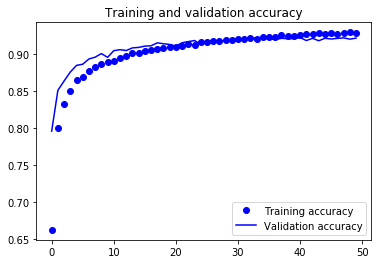

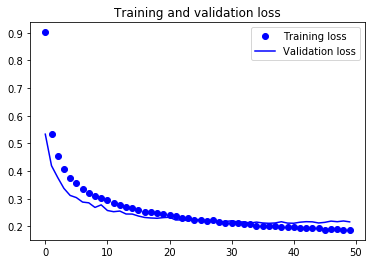

In [36]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Predict with trained model on test set

In [41]:
predicted_classes = model.predict_classes(X_test)

In [42]:
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [43]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.91      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.90      0.90      1000
     Class 3       0.93      0.94      0.94      1000
     Class 4       0.90      0.90      0.90      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.81      0.73      0.77      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



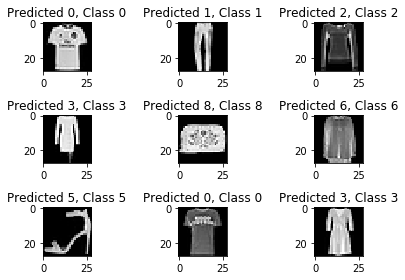

In [44]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

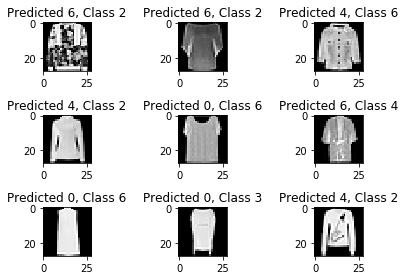

In [45]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

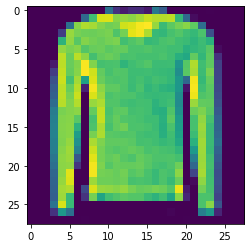

In [46]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


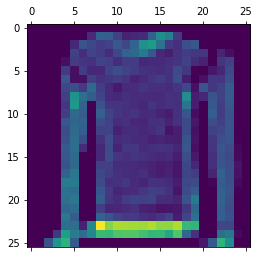

In [47]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


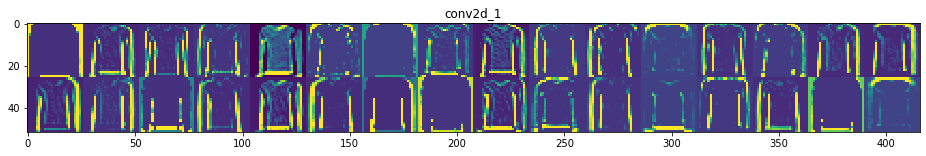

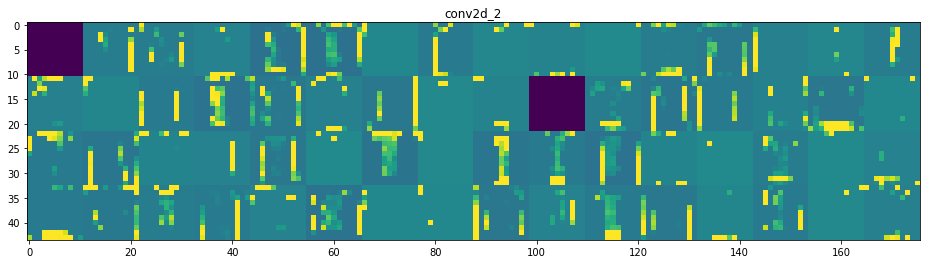

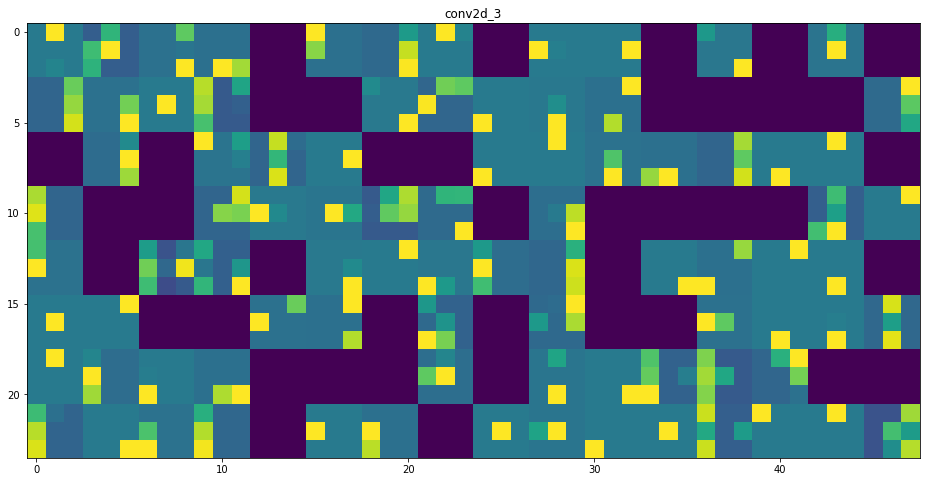

In [48]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# T-SNE

In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#First going to process the data into image matricies
data = pd.read_csv('fashion-mnist_train.csv')
X_train = data.iloc[:,1:].values
y_train = data.label.values
print(X_train.shape[0])

#Reshape X, 28 px by 28 px, rescale to 0-1(same for digit mnist)
X_train = X_train.reshape(X_train.shape[0],28,28)
X_train = X_train/255

# Any results you write to the current directory are saved as output.

60000


In [54]:
pca = PCA(n_components=30)
Xp = pca.fit_transform(data.iloc[:,1:])
print(Xp.shape)

(60000, 30)


[t-SNE] Computing 1 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.014s...
[t-SNE] Computed neighbors for 1000 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 0.000000
[t-SNE] KL divergence after 650 iterations: 0.000000
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 297.671248
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.259750
[t-SNE] KL divergence after 1000 iterations: 0.788901
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 345.456910
[t-SNE] KL divergence after

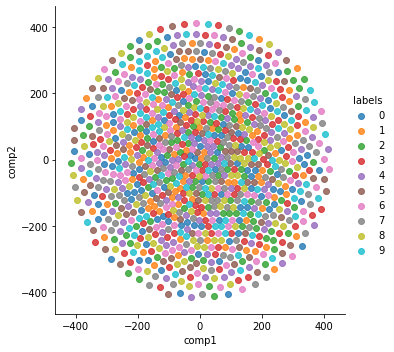

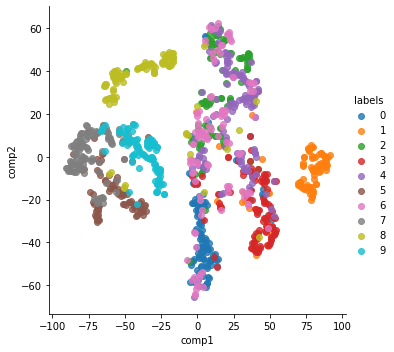

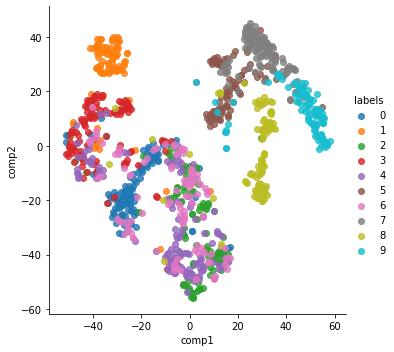

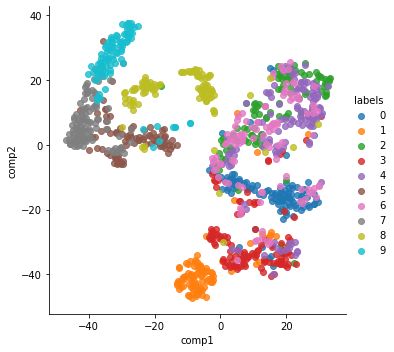

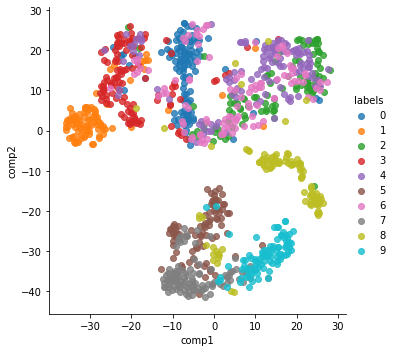

In [55]:
n_sne = 1000
for i in range(5):
    tsne = TSNE(n_components=2,verbose=1,perplexity=10*i,n_iter=1000)
    X_tsne = tsne.fit_transform(Xp[:n_sne])
    Xf = pd.DataFrame(X_tsne)
    Xf.columns = ["comp1","comp2"]
    Xf['labels'] = y_train[:n_sne]
    sns.lmplot("comp1","comp2",hue="labels",data=Xf,fit_reg=False)

In [56]:
n_tsne = 1000
#Since 60000 is to large to feed through TSNE, will limit it to 1,000 reference greatly to https://www.kaggle.com/dualphase/t-sne
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000)
Xt = tsne.fit_transform(Xp[:n_tsne])
print(Xt.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 382.314048
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.149574
[t-SNE] KL divergence after 1000 iterations: 0.607846
(1000, 2)


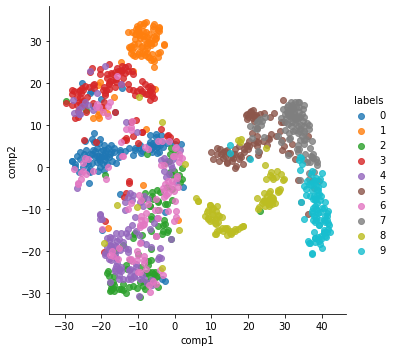

In [57]:
Xdf = pd.DataFrame(Xt)
Xdf.columns = ['comp1','comp2']
Xdf['labels'] = y_train[:n_tsne]
sns.lmplot('comp1','comp2',hue='labels',data=Xdf,fit_reg=False)

In [58]:
knn = NearestNeighbors(500)
knn.fit(Xt[:500])
imgt = Xt[5].reshape(1,Xt[4].shape[0])
dist,neigh = knn.kneighbors(imgt.reshape(1,-1))
neigh = neigh[0]

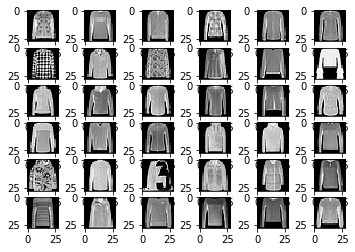

In [59]:
for i,j in enumerate(neigh[:36]):
    plt.subplot(6,6,i+1)
    plt.imshow(X_train[j],cmap='gray')